In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('zomato.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [3]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)
data['rate'] = data['rate'].apply(handleRate)
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<ipython-input-4-a4d1b13fb197>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['listed_in(type)'],palette=['blue','red','yellow','green'])


Text(0.5, 0, 'Types of Resturant')

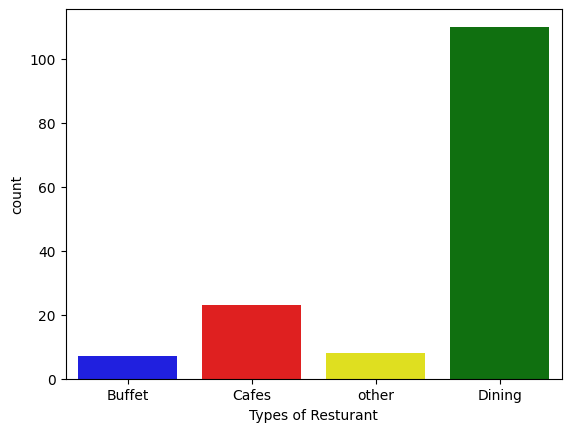

In [4]:
sns.countplot(x=data['listed_in(type)'],palette=['blue','red','yellow','green'])
plt.xlabel('Types of Resturant')

Text(0, 0.5, 'Votes')

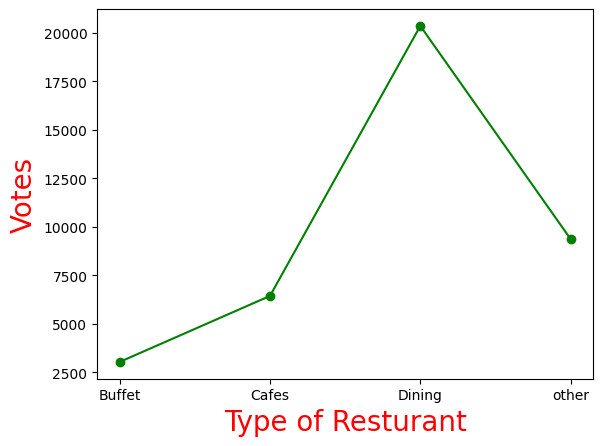

In [6]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='g',marker='o')
plt.xlabel('Type of Resturant',c='r',size=20)
plt.ylabel('Votes',c='r',size=20)

## Conclusion - dinning resturants has recieved maximum votes

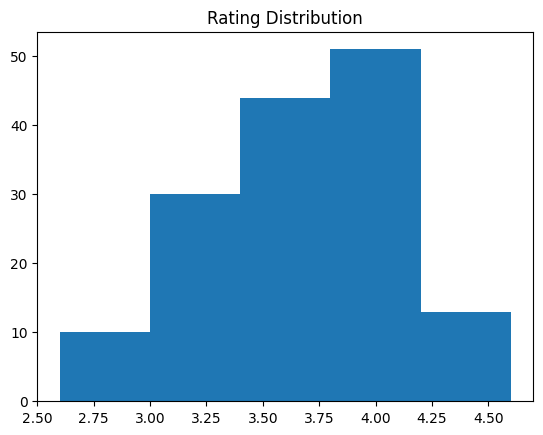

In [7]:
plt.hist(data['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

# Conclusion - The majority resturants recieved ratings from 3.5 to 4

Average order spending by couples



<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

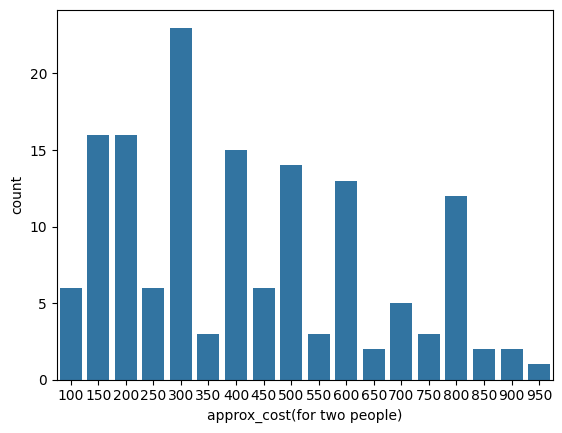

In [8]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion - The majority of couples prefer resturants with an approximate cost of 300 repees

# Which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

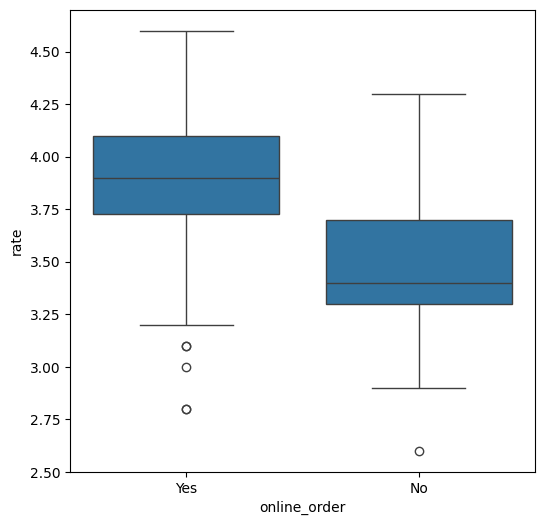

In [9]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = data)

# Conclusion - Offline order received lower rating in comparison to online order

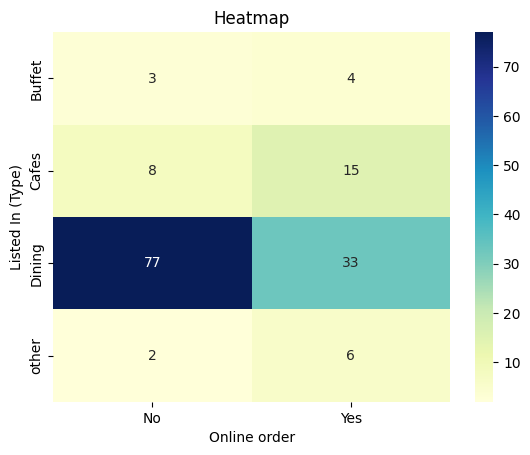

In [10]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel('Listed In (Type)')
plt.show()

# Conclusion - Dining resturants primarily accept offline orders, whereas cafes primarily receive online orders. This suggest that clients prefers to orders in person at resturants, but prefer online ordering at cafes.